## 7072CEM - Machine Learning

## Student Name: Sahil Mathur
## SID: 11724841

 
## Student Name: Sukhmani Saini
## SID: 11938091
 
## Module Leader: Dr. Omid Chatrabgoun


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
# importing plotly library
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [ ]:
plotly.offline.init_notebook_mode() 

## About the Dataset: 
As stated above, our dataset has 10 numerical features and 8 categorical features. Taking a look at the dataset description:

Column Descriptions:
Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.

##### Attribute Information: 

There are 10 numerical and 8 category attributes in the dataset. The class label can be the value of the 'Revenue' attribute. A total of 12,330 sessions were included in the dataset, of which 10,422 were negative class samples and the remaining 1908 were positive class samples that included shopping.

The terms "Administrative," "Administrative Duration," "Informational," "Informational Duration," "Product Related," and "Product Related Duration" indicate the number of various page kinds that the visitor visited during that session and the sum of the time spent on each of these page types.

When a user takes an action, such as switching between pages, the values of these features are updated in real time based on the URL information of the user's visited pages.

##### Basically, we are going to compare each features with respect to the target variable Revenue (whether or not the user completed the purchase)

In [161]:
df = pd.read_csv('online_shoppers_intention.csv')

In [162]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
df.shape

(12330, 18)

In [6]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [7]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

#### numerical = ['Administrative','Administrative_Duration','Informational', 'Informational_Duration','ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'] <br>
#### categorical = ['OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Month','Revenue']

## EDA

#### 1. Univariate Analysis
- we are going to analyse each variable.

##### 1.1. Revenue 
- target variable

In [8]:
import warnings
warnings.filterwarnings('ignore')

The unique values in column Revenue:
 False    10422
True      1908
Name: Revenue, dtype: int64


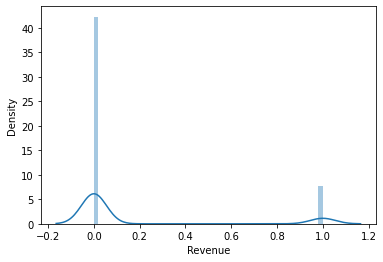

In [9]:
# checking the unique values
revenue = df['Revenue'].value_counts()
print("The unique values in column Revenue:\n",revenue)
# plotting the distribution
sns.distplot(df['Revenue'])
plt.show()

- This indicates that the data is highly imbalanced.

##### 1.2. Weekend

Unique values in column Weekend:
 False    9462
True     2868
Name: Weekend, dtype: int64


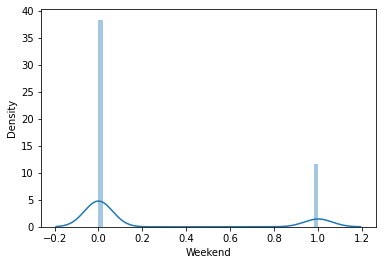

In [10]:
# checking the unique values
week = df['Weekend'].value_counts()
print("Unique values in column Weekend:\n",week)
# plotting the distribution 
sns.distplot(df['Weekend'])
plt.show()

- The data is imbalanced in this column as well.

##### 1.3. Browsers

Unqiue values of column Browser:
 2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


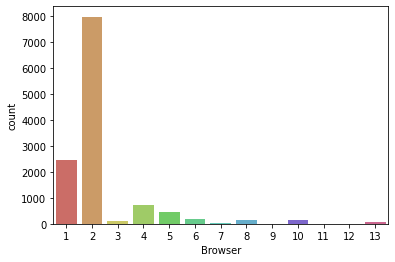

In [11]:
# checking the unique values
browser = df['Browser'].value_counts()
print("Unqiue values of column Browser:\n",browser)
# plotting the distribution
sns.countplot(x=df['Browser'], data=df, palette='hls')
plt.show()

- The plot above indicates that Majority of the user are in top 2 browsers.

##### 1.4. Operating Systems


Unique values column in Operating Systems:
 2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


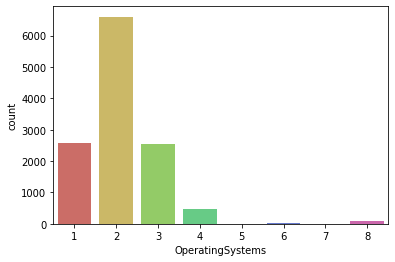

In [12]:
# checking the unique values
os = df['OperatingSystems'].value_counts()
print("Unique values column in Operating Systems:\n",os)
# plotting the distribution of each unique value
sns.countplot(x=df['OperatingSystems'], data=df, palette='hls')
plt.show()

- This indicates that the top 3 columns cover 90% of the dataset.

##### 1.5. Month 

Unique values column in Month:
 May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


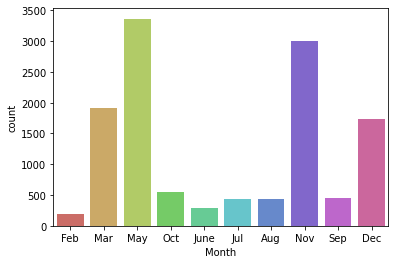

In [13]:
# checking the unique values
month = df['Month'].value_counts()
print("Unique values column in Month:\n",month )
# plotting the distribution of each unique value
sns.countplot(x=df['Month'], data=df, palette='hls')
plt.show()

- May and Nov are the peak months.

##### 1.6. Visitor Type

Unique values column in Visitor Month:
 Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


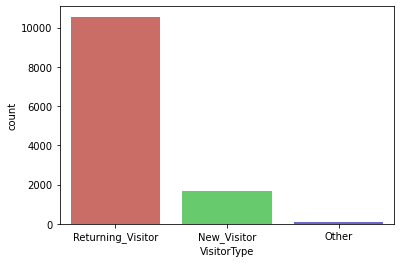

In [14]:
# checking the unique values
vmonth = df['VisitorType'].value_counts()
print("Unique values column in Visitor Month:\n",vmonth )
# plotting the distribution of each unique value
sns.countplot(x=df['VisitorType'], data=df, palette='hls')
plt.show()

- The plot above indicates that more than 80% are the returning visitors.

##### 1.7. Traffic Type

Unique values column in Traffic Type:
 2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64


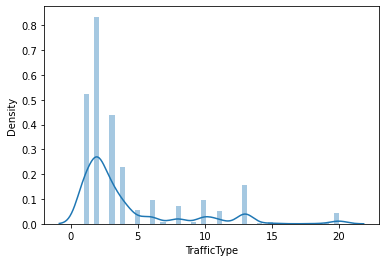

In [15]:
# checking the unique values
tt = df['TrafficType'].value_counts()
print("Unique values column in Traffic Type:\n",tt )
# plotting the distribution of each unique value
sns.distplot(df['TrafficType'])
plt.show()


- The plot indicates that there are 20 different types of traffic codes.
- The traffic type is normally distributed.

##### 1.8. Region 

Unique values column in Region:
 1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64


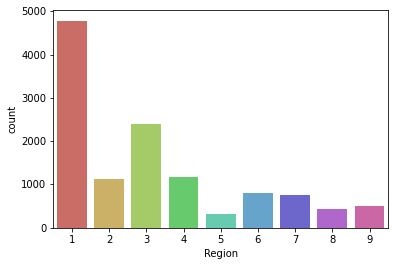

In [16]:
# checking the unique values
region = df['Region'].value_counts()
print("Unique values column in Region:\n",region )
# plotting the distribution of each unique value
sns.countplot(x=df['Region'], data=df, palette='hls')
plt.show()

- The plot indicates that there are different types of users with respect to the region.
- There are 9 different region codes.
- This columns is not normally distributed.

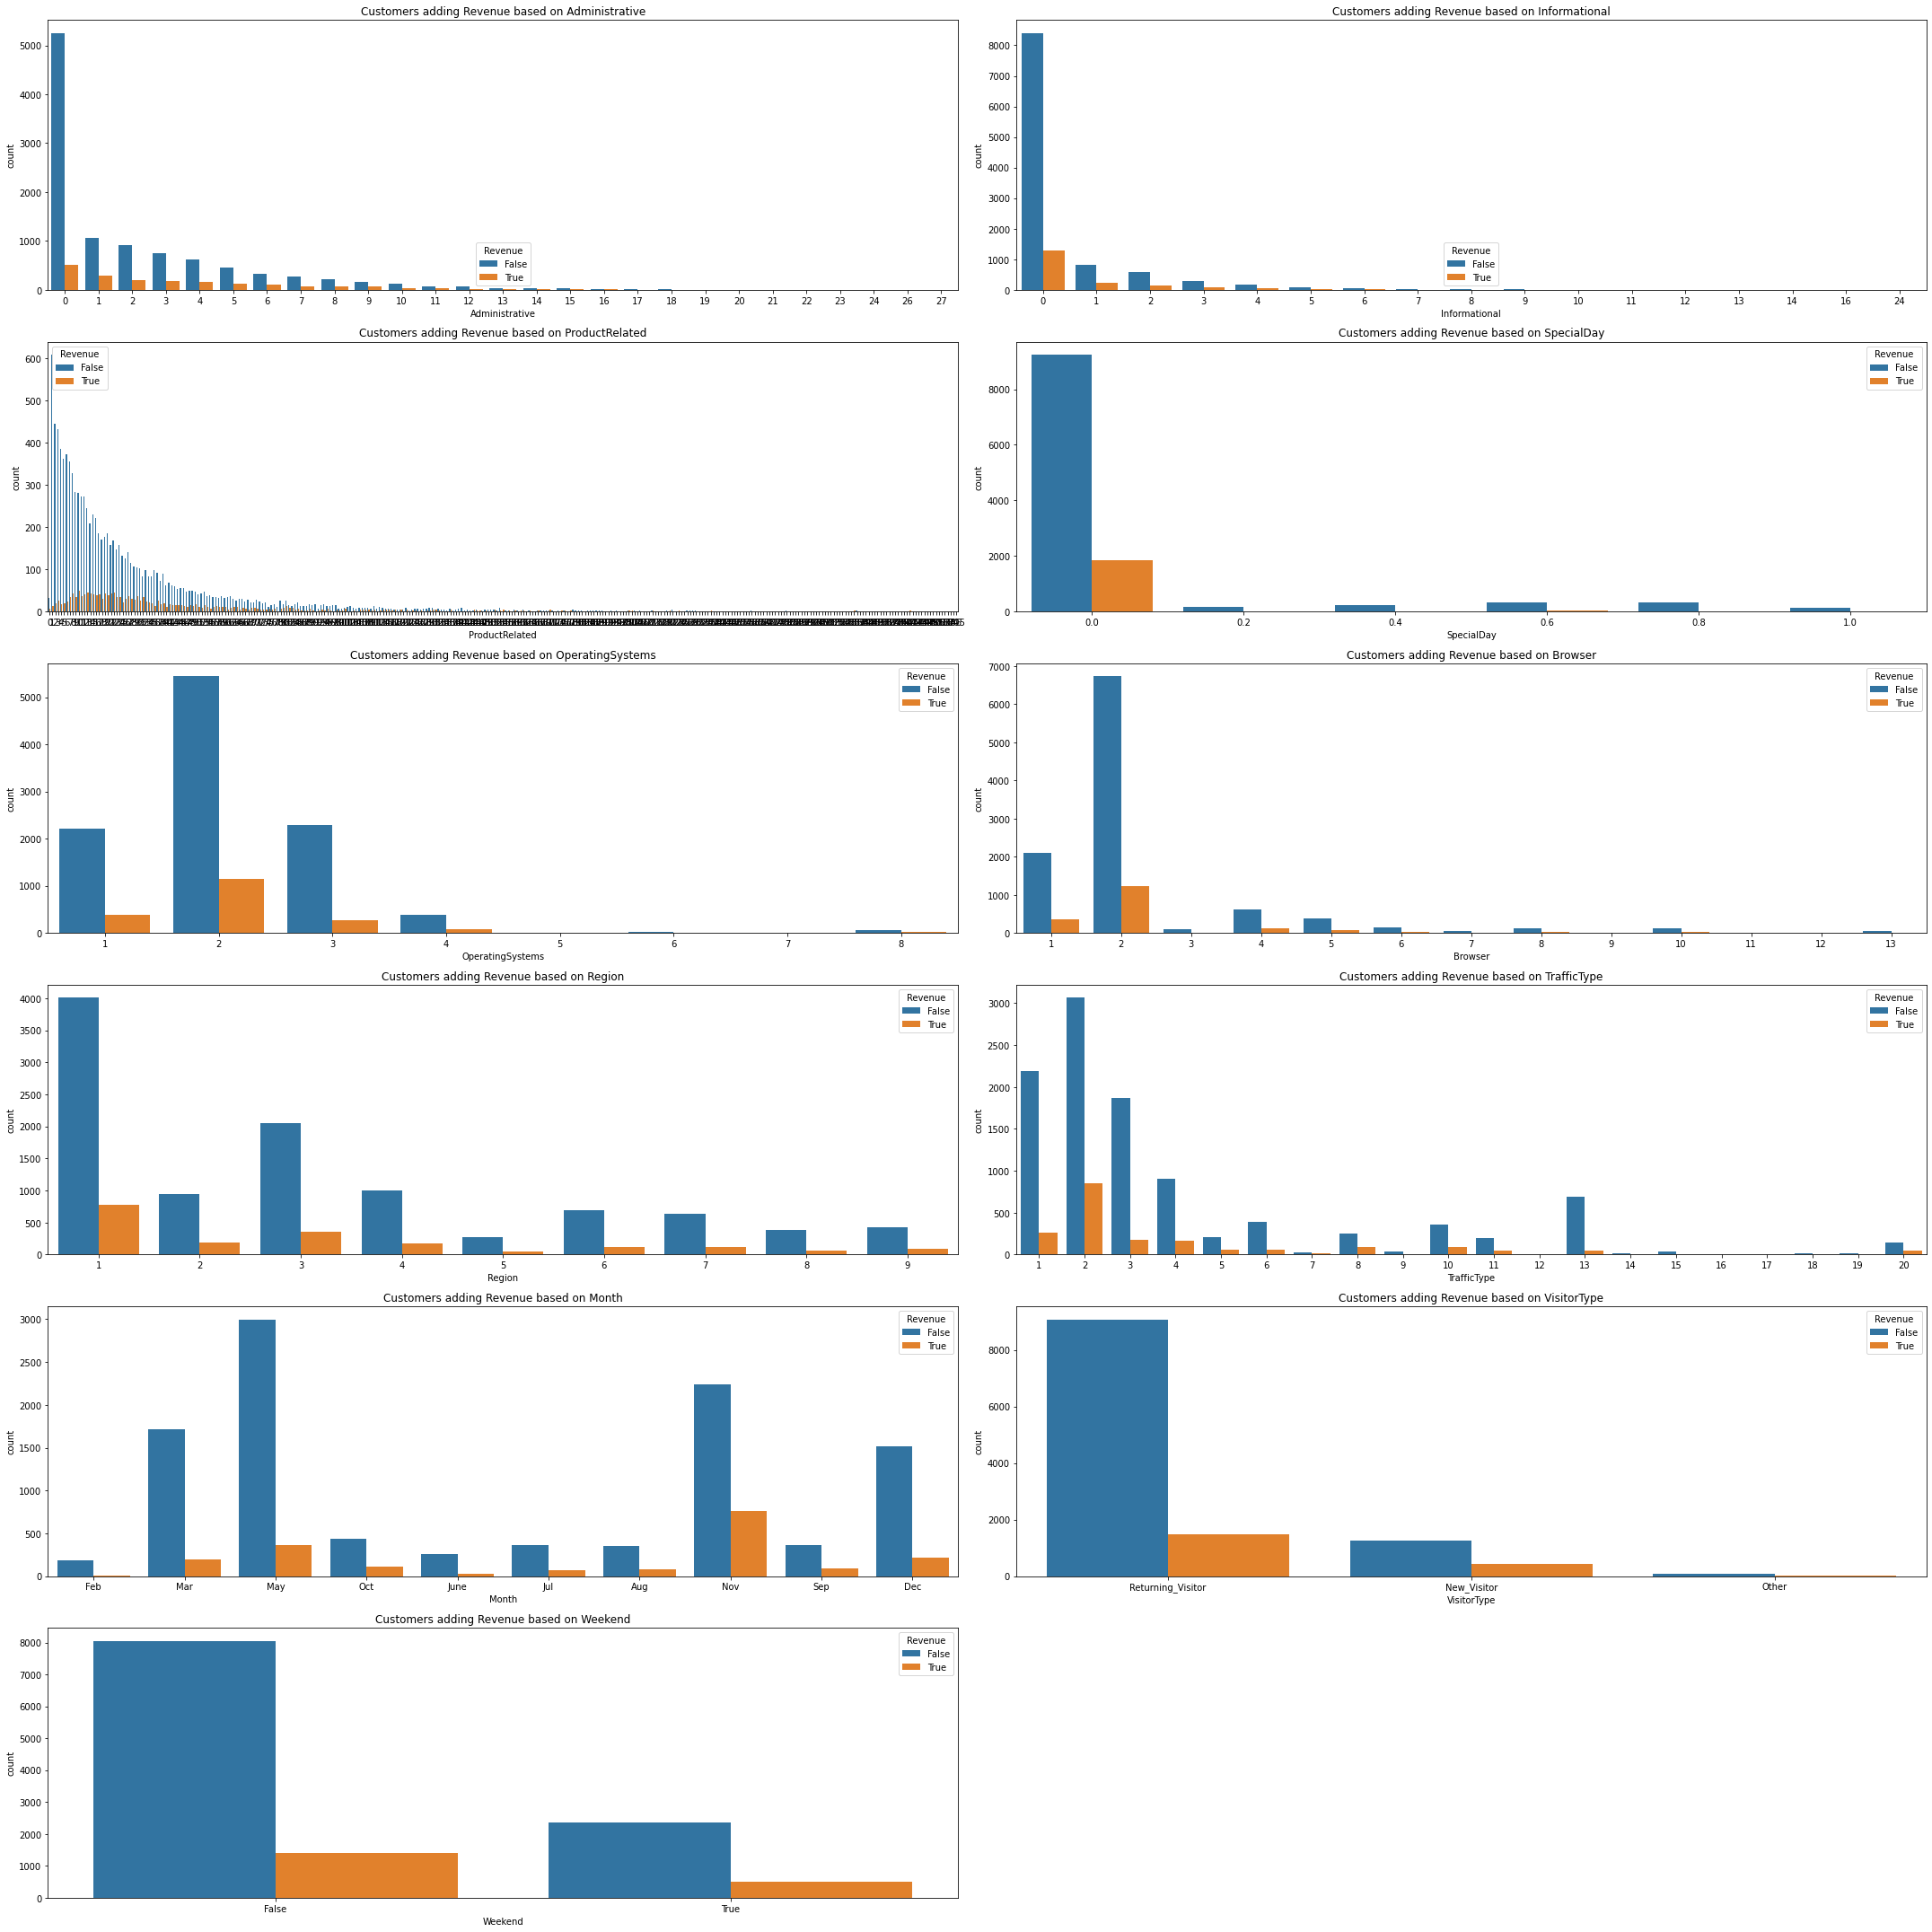

In [18]:
column1l=['Administrative','Informational','ProductRelated','SpecialDay','OperatingSystems','Browser','Region','TrafficType','Month','VisitorType','Weekend']    
plt.figure(figsize=(30,30))
plot_number = 0
for i in column1l:
    plot_number = plot_number + 1
    ax = plt.subplot(6, 2, plot_number,adjustable='datalim')
    sns.countplot(df[i],hue=df['Revenue'])
    ax.set_title('Customers adding Revenue based on '+ i,fontdict=None)
    plt.tight_layout()

##### 2.5. Page values vs revenue

In [149]:
fig = plotly.express.strip(df,x='PageValues',y='Revenue',color='Revenue')
fig.show()

-  PageValue is exponentially distributed for both true and false
- outliers in purchased (true) according to ExitRates
- PageValues are highly influences to purchased(True) a product.

##### 3.1. Month vs PageValues wrt Revenue

In [151]:
fig = px.box(df, x='Month', y='PageValues', color='Revenue')
fig.show()

- normally distributed
- outliers

#### Statistical Test

we will performm statistical test in two parts:
1. categorical columns vs target column (revenue)
2. numerical columns vs target column (revenue)

In [38]:
categoricals =['Administrative','Informational','ProductRelated','Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'SpecialDay']

#### 1. Categorical columns vs target column (revenue)

##### 1.1. Chi-squared test

A chi-squared test, also written as χ² test, is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test and variants thereof.

###### chi2_contingency
Chi-square test of independence of variables in a contingency table.

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed. The expected frequencies are computed based on the marginal sums under the assumption of independence; see scipy.stats.contingency.expected_freq. The number of degrees of freedom is (expressed using numpy functions and attributes):

dof = observed.size - sum(observed.shape) + observed.ndim - 1

In [39]:
# importing the libraries
#statistics tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

#scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [40]:
# check wheather Revenue is influenced by categorical column
# Null Hypopthesis, H0 = proportion of revenue accross the category is same
# Alternative Hypothesis, H1 = proportion of revenue at least in two category is different
scol = []
spval = []
ss = []
for n in categoricals:
    scol.append(n)
    cp = chi2_contingency(pd.crosstab(df[n], df['Revenue']))[1]
    spval.append(round(cp, 4))
    if cp < 0.05:
        # rejects Null Hypothesis
        ss.append('*') # significant
    else:
        # Accept Null Hypothesis
        ss.append('**') # not significant

In [41]:
pd.DataFrame({'Feature': scol, 'P-Value': spval, 'Significance': ss})

,Feature,P-Value,Significance
0,Administrative,0.0000,*
1,Informational,0.0000,*
2,ProductRelated,0.0000,*
3,Month,0.0000,*
4,OperatingSystems,0.0000,*
5,Browser,0.0061,*
6,Region,0.3214,**
7,TrafficType,0.0000,*
8,VisitorType,0.0000,*
9,Weekend,0.0013,*


#### 2. numerical columns vs target column (revenue)

In [42]:
numerical_columns=['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues']

##### Shapiro-Wilk test

The null hypothesis for the Shapiro-Wilk test is that a variable is normally distributed in some population. A different way to say the same is that a variable’s values are a simple random sample from a normal distribution. As a rule of thumb, we reject the null hypothesis if p < 0.05.

In [43]:
# Two-Sample T-test
tcol = []
tpval = []
ts = []
for n in numerical_columns:
    tcol.append(n)
    # splitting into 2 groups(Revenue = True, Revenue = False)
    g1 = df[n][df['Revenue'] == False]
    g2 = df[n][df['Revenue'] == True]
    # Test for normality(Shapiro Test)
    # H0: Data is normal
    # H1: Data is not normal
    # if p < 0.05 --- reject Null Hypothesis
    for b in [g1]:
        s, p = shapiro(b)
    for c in [g2]:
        s1, p1 = shapiro(c)
    if p > 0.05 or p1 > 0.05:
        w, lp = levene(g1, g2)
    # If doesn't pass normality or variance test, we do non-parametric Test(mannwhitneyu Test)
    if p <= 0.05 or p1 <= 0.05 or lp <= 0.05:
        ms, mp = mannwhitneyu(g1, g2)
        tpval.append(round(mp, 4))
    if mp < 0.05:
        ts.append('*')  # significant
    else:
        ts.append('**') # not significant

In [44]:
pd.DataFrame({'Feature': tcol, 'P-Value': tpval, 'Significance': ts})

,Feature,P-Value,Significance
0,Administrative_Duration,0.0,*
1,Informational_Duration,0.0,*
2,ProductRelated_Duration,0.0,*
3,BounceRates,0.0,*
4,ExitRates,0.0,*
5,PageValues,0.0,*


##### Outliers

<AxesSubplot:>

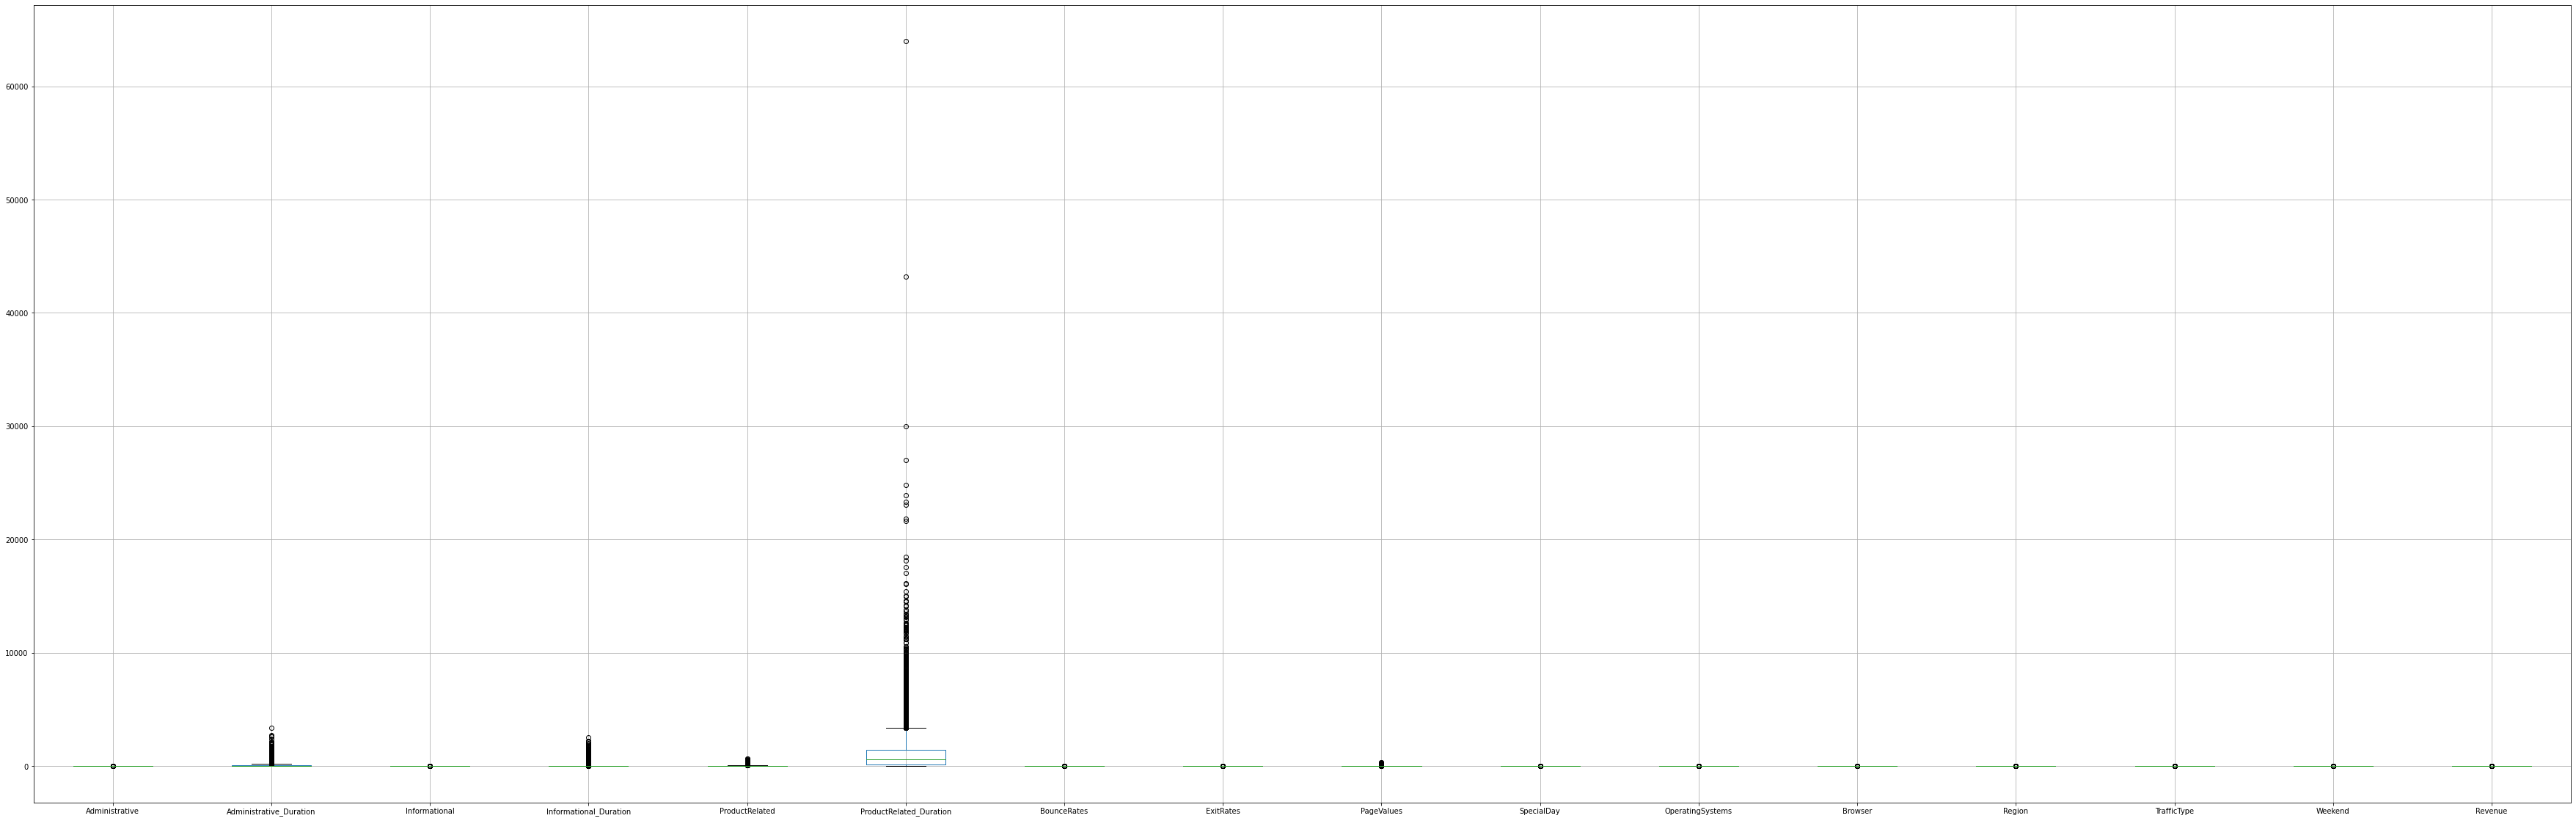

In [45]:
plt.figure(figsize=(62, 20))
df.boxplot()

In [46]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
outlier_per=[]
for i in numerical_columns:
    df_mean, df_std = mean(df[i]), std(df[i])
    
    # identify outliers
    cut_off = df_std * 3
    lower, upper = df_mean - cut_off, df_mean + cut_off
    print(i, ': \n')

    # identify outliers
    outliers = [x for x in df[i] if x < lower or x > upper]
    
    num_out = len(outliers)
    print('Identified outliers: %d' %num_out)
    outliers_removed = [x for x in df[i] if x >= lower and x <= upper]
    num_nout = len(outliers_removed)
    print('Non-outlier observations: %d' %num_nout)
    outlier_percent = (num_out / (num_out + num_nout)) * 100
    print('Percent of outliers:', outlier_percent, '\n')
    outlier_per.append(outlier_percent)

Administrative_Duration : 

Identified outliers: 232
Non-outlier observations: 12098
Percent of outliers: 1.8815896188158963 

Informational_Duration : 

Identified outliers: 230
Non-outlier observations: 12100
Percent of outliers: 1.8653690186536902 

ProductRelated_Duration : 

Identified outliers: 219
Non-outlier observations: 12111
Percent of outliers: 1.7761557177615572 

BounceRates : 

Identified outliers: 708
Non-outlier observations: 11622
Percent of outliers: 5.742092457420925 

ExitRates : 

Identified outliers: 713
Non-outlier observations: 11617
Percent of outliers: 5.78264395782644 

PageValues : 

Identified outliers: 259
Non-outlier observations: 12071
Percent of outliers: 2.1005677210056772 



In [47]:
Outliers = pd.DataFrame({'Feature': numerical_columns, '% Of Outliers': outlier_per})
outlier_sorted = Outliers.sort_values('% Of Outliers', ascending = False)
outlier_sorted

,Feature,% Of Outliers
4,ExitRates,5.782644
3,BounceRates,5.742092
5,PageValues,2.100568
0,Administrative_Duration,1.881590
1,Informational_Duration,1.865369
2,ProductRelated_Duration,1.776156


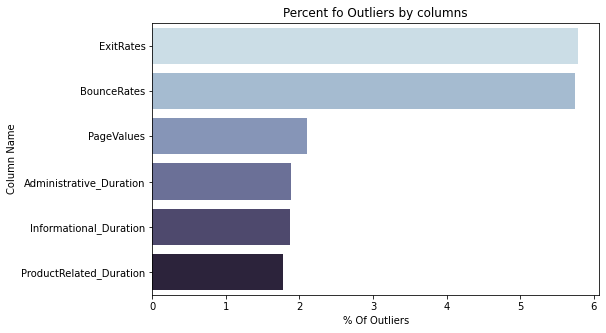

In [48]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.barplot(y = outlier_sorted['Feature'], x = outlier_sorted['% Of Outliers'], palette = 'ch:s=.25,rot=-.25')
plt.title('Percent fo Outliers by columns')
plt.ylabel('Column Name')
plt.show()

In [163]:
df2 = df.copy()
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


##### Distribution before Transformation

array([[<AxesSubplot:title={'center':'Administrative_Duration'}>,
        <AxesSubplot:title={'center':'Informational_Duration'}>],
       [<AxesSubplot:title={'center':'ProductRelated_Duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>],
       [<AxesSubplot:title={'center':'ExitRates'}>,
        <AxesSubplot:title={'center':'PageValues'}>]], dtype=object)

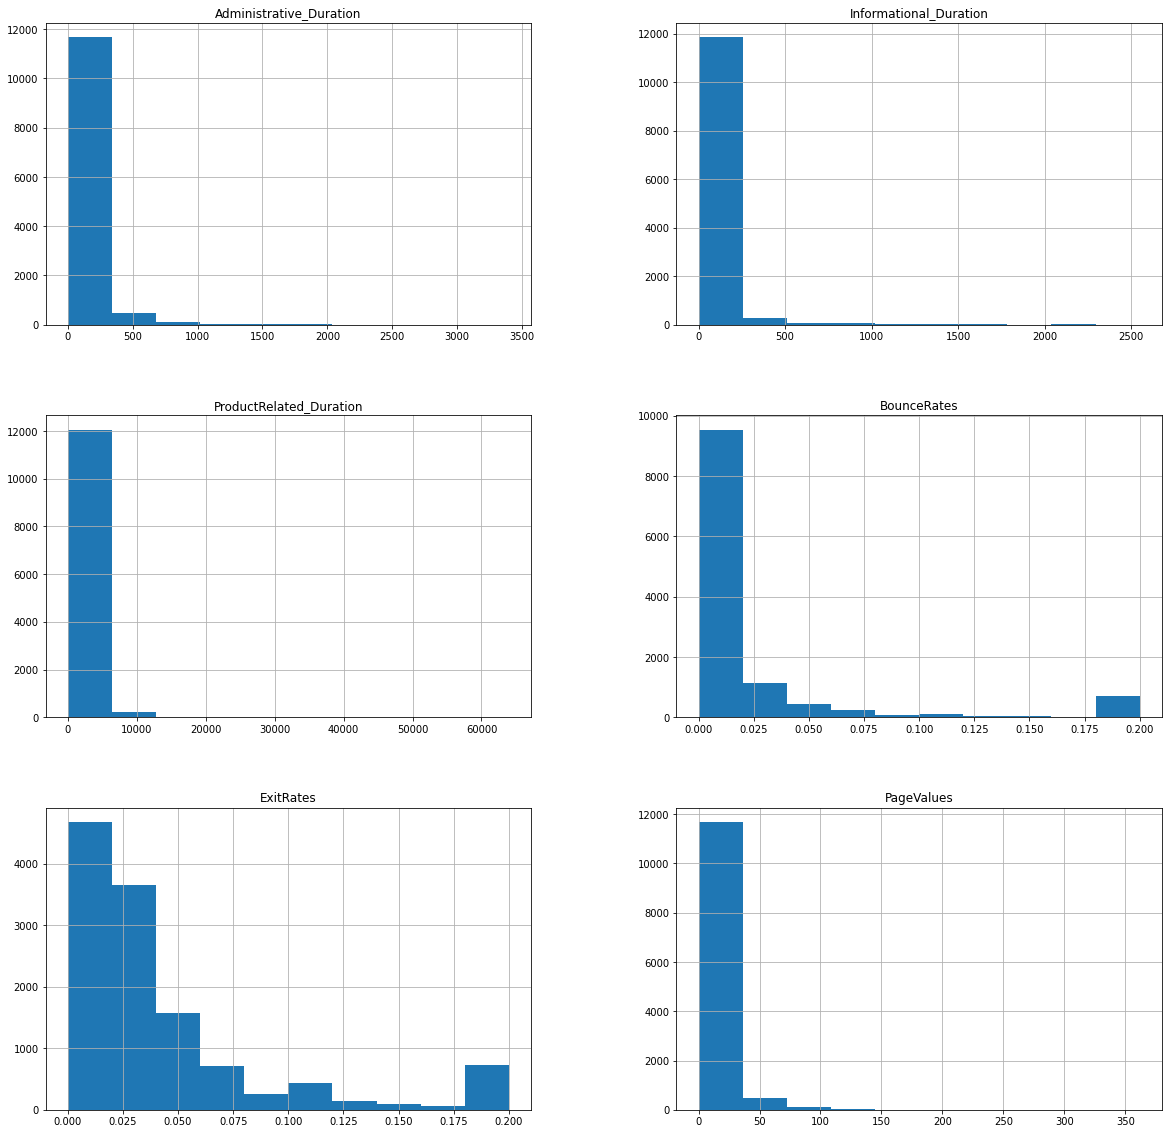

In [164]:
df2.hist(column=numerical_columns,figsize=(20,20))

##### Transforming the columns with the best transformation technique given by above code

In [165]:
df2['Administrative_Duration']=1/(df['Administrative_Duration']+1)
df2['Informational_Duration'],i = st.boxcox(df['Informational_Duration']+1)
df2['ProductRelated_Duration'],pd = st.boxcox(df['ProductRelated_Duration']+1)
df2['BounceRates']= df['BounceRates']**0.2 
df2['ExitRates']=df['ExitRates']**0.2 
df2['PageValues'],p = st.boxcox(df['PageValues']+1)

##### Distribution after transformation

array([[<AxesSubplot:title={'center':'Administrative_Duration'}>,
        <AxesSubplot:title={'center':'Informational_Duration'}>],
       [<AxesSubplot:title={'center':'ProductRelated_Duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>],
       [<AxesSubplot:title={'center':'ExitRates'}>,
        <AxesSubplot:title={'center':'PageValues'}>]], dtype=object)

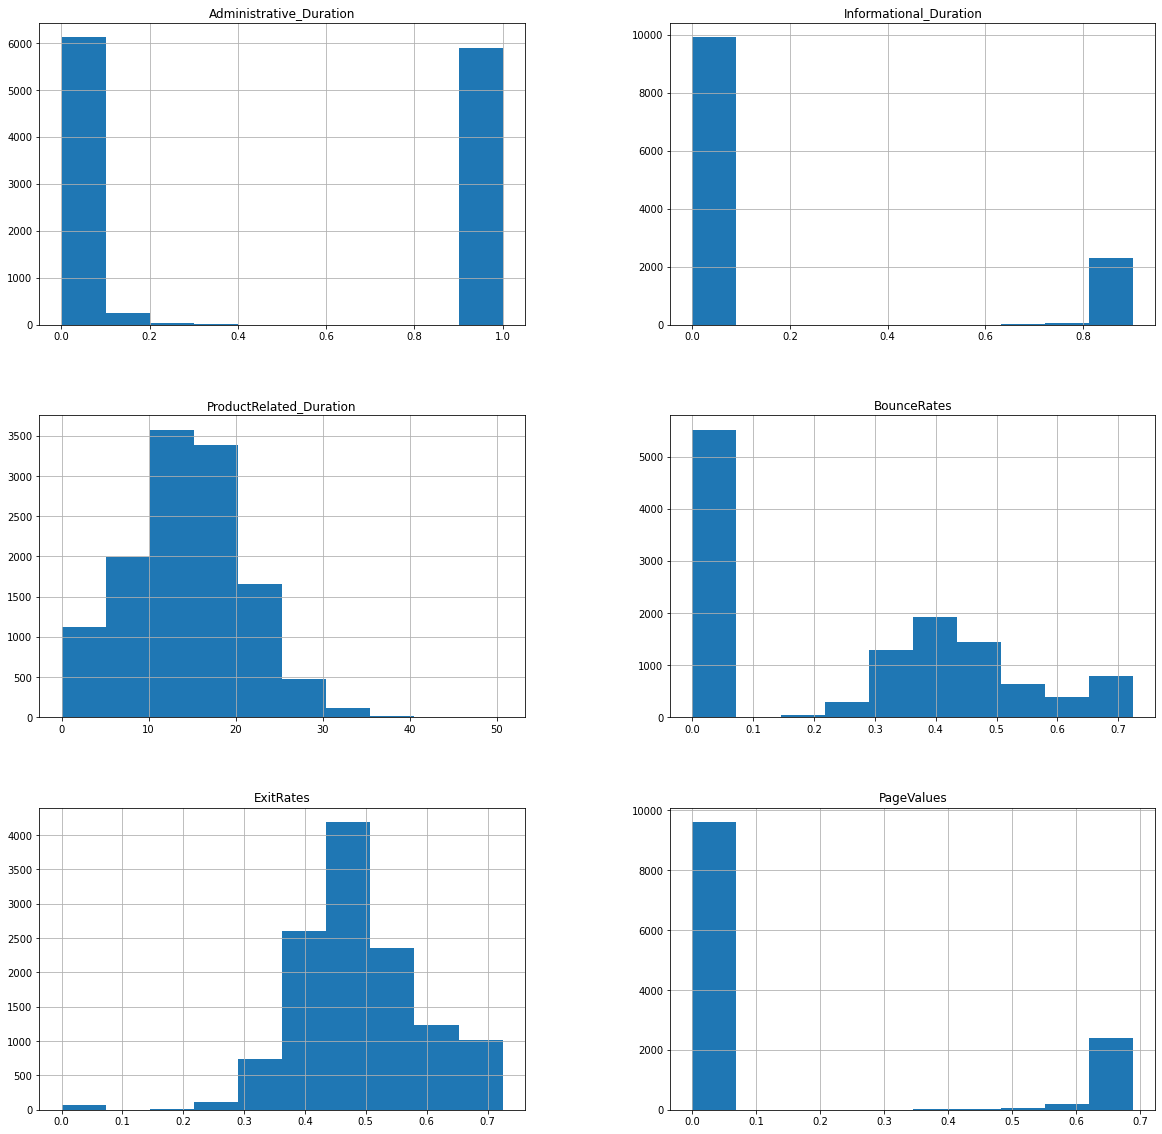

In [166]:
df2.hist(column=numerical_columns,figsize=(20,20))

#### Data Pre-Processing

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [58]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [59]:
def encoding(c):
    from sklearn import preprocessing
    # label_encoder object knows how to understand word labels.
    label_encoder = preprocessing.LabelEncoder()
 
    # Encode labels in column 'species'.
    df2[c]= label_encoder.fit_transform(df2[c])
 
    df2[c].unique()
    return df2

In [60]:
encoding('Revenue')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,1.000000,0,0.0,1,0.000000,0.724780,0.724780,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,1.000000,0,0.0,2,6.990788,0.000000,0.630957,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,1.000000,0,0.0,1,0.000000,0.724780,0.724780,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,1.000000,0,0.0,2,1.513204,0.549280,0.674879,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,1.000000,0,0.0,10,14.727490,0.457305,0.549280,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0.006849,0,0.0,53,19.881739,0.372198,0.492687,0.673415,0.0,Dec,4,6,1,1,Returning_Visitor,True,0
12326,0,1.000000,0,0.0,5,13.470013,0.000000,0.463246,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,0
12327,0,1.000000,0,0.0,6,10.068619,0.608364,0.613155,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,0
12328,4,0.013158,0,0.0,15,12.299439,0.000000,0.462021,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,0


In [61]:
df2['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [62]:
encoding('Weekend')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,1.000000,0,0.0,1,0.000000,0.724780,0.724780,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,1.000000,0,0.0,2,6.990788,0.000000,0.630957,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,1.000000,0,0.0,1,0.000000,0.724780,0.724780,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,1.000000,0,0.0,2,1.513204,0.549280,0.674879,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,1.000000,0,0.0,10,14.727490,0.457305,0.549280,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0.006849,0,0.0,53,19.881739,0.372198,0.492687,0.673415,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12326,0,1.000000,0,0.0,5,13.470013,0.000000,0.463246,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12327,0,1.000000,0,0.0,6,10.068619,0.608364,0.613155,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12328,4,0.013158,0,0.0,15,12.299439,0.000000,0.462021,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


In [63]:
df2['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [64]:
encoding('VisitorType')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,1.000000,0,0.0,1,0.000000,0.724780,0.724780,0.000000,0.0,Feb,1,1,1,1,2,0,0
1,0,1.000000,0,0.0,2,6.990788,0.000000,0.630957,0.000000,0.0,Feb,2,2,1,2,2,0,0
2,0,1.000000,0,0.0,1,0.000000,0.724780,0.724780,0.000000,0.0,Feb,4,1,9,3,2,0,0
3,0,1.000000,0,0.0,2,1.513204,0.549280,0.674879,0.000000,0.0,Feb,3,2,2,4,2,0,0
4,0,1.000000,0,0.0,10,14.727490,0.457305,0.549280,0.000000,0.0,Feb,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0.006849,0,0.0,53,19.881739,0.372198,0.492687,0.673415,0.0,Dec,4,6,1,1,2,1,0
12326,0,1.000000,0,0.0,5,13.470013,0.000000,0.463246,0.000000,0.0,Nov,3,2,1,8,2,1,0
12327,0,1.000000,0,0.0,6,10.068619,0.608364,0.613155,0.000000,0.0,Nov,3,2,1,13,2,1,0
12328,4,0.013158,0,0.0,15,12.299439,0.000000,0.462021,0.000000,0.0,Nov,2,2,3,11,2,0,0


In [65]:
encoding('Month')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,1.000000,0,0.0,1,0.000000,0.724780,0.724780,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,1.000000,0,0.0,2,6.990788,0.000000,0.630957,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,1.000000,0,0.0,1,0.000000,0.724780,0.724780,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,1.000000,0,0.0,2,1.513204,0.549280,0.674879,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,1.000000,0,0.0,10,14.727490,0.457305,0.549280,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0.006849,0,0.0,53,19.881739,0.372198,0.492687,0.673415,0.0,1,4,6,1,1,2,1,0
12326,0,1.000000,0,0.0,5,13.470013,0.000000,0.463246,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,1.000000,0,0.0,6,10.068619,0.608364,0.613155,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,0.013158,0,0.0,15,12.299439,0.000000,0.462021,0.000000,0.0,7,2,2,3,11,2,0,0


In [66]:
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,2,1,1,1,1,2,0,0
1,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,2,2,2,1,2,2,0,0
2,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,2,4,1,9,3,2,0,0
3,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,2,3,2,2,4,2,0,0
4,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,2,3,3,1,4,2,1,0


#### Feature Engineering

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df2)

StandardScaler()

In [68]:
X = df2.drop('Revenue',axis=1)
y = df2['Revenue']

In [69]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,2,1,1,1,1,2,0
1,0,1.0,0,0.0,2,6.990788,0.000000,0.630957,0.0,0.0,2,2,2,1,2,2,0
2,0,1.0,0,0.0,1,0.000000,0.724780,0.724780,0.0,0.0,2,4,1,9,3,2,0
3,0,1.0,0,0.0,2,1.513204,0.549280,0.674879,0.0,0.0,2,3,2,2,4,2,0
4,0,1.0,0,0.0,10,14.727490,0.457305,0.549280,0.0,0.0,2,3,3,1,4,2,1


In [70]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64

In [71]:
# splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [73]:
print(x_train.shape,y_train.shape)

(8631, 17) (8631,)


In [75]:
print(x_test.shape,y_test.shape)

(3699, 17) (3699,)


#### Data Modelling - without SMOTE

In [76]:
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

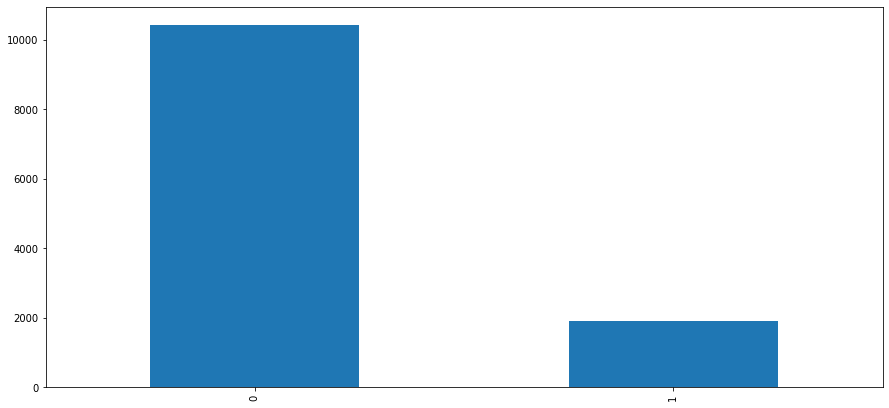

In [77]:
df2['Revenue'].value_counts().plot(kind='bar')
plt.show()

##### 1. logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
log=LogisticRegression(C=0.005994,penalty='l1',solver='liblinear')
log.fit(x_train,y_train)
print('Train score:',log.score(x_train,y_train))
print('Test score:',log.score(x_test,y_test))
#log.C_

Train score: 0.8693083072645117
Test score: 0.8680724520140578


In [79]:
from sklearn.metrics import accuracy_score,cohen_kappa_score,classification_report
from sklearn.metrics import f1_score
log_pred=log.predict(x_test)
print('F1 Score:',f1_score(y_test,log_pred))
print('Kappa Score:',cohen_kappa_score(y_test,log_pred))
print('Classification report:\n',classification_report(y_test,log_pred))

F1 Score: 0.3527851458885942
Kappa Score: 0.3005713648047649
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      3127
           1       0.73      0.23      0.35       572

    accuracy                           0.87      3699
   macro avg       0.80      0.61      0.64      3699
weighted avg       0.85      0.87      0.84      3699



<AxesSubplot:>

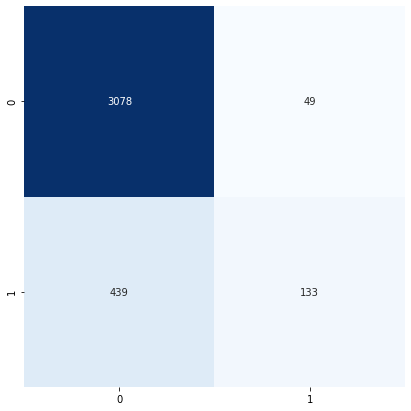

In [80]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, log_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [81]:
fpr,tpr,thresh=roc_curve(y_test,log_pred)
auc_log=auc(fpr,tpr)

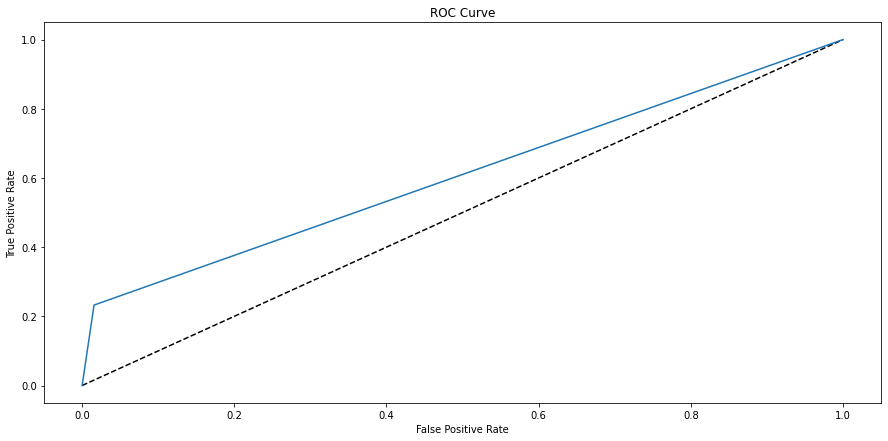

In [82]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

##### 2. Decision Tree


In [83]:
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(x_train,y_train)
print('Train score:',dt.score(x_train,y_train))
print('Test score:',dt.score(x_test,y_test))

Train score: 0.9139149577105782
Test score: 0.8988915923222492


In [84]:
dt_pred=dt.predict(x_test)
print('F1 Score:',f1_score(y_test,dt_pred))
print('Kappa Score:',cohen_kappa_score(y_test,dt_pred))
print('Classification report:\n',classification_report(y_test,dt_pred))

F1 Score: 0.6382978723404256
Kappa Score: 0.5803015437598862
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      3127
           1       0.71      0.58      0.64       572

    accuracy                           0.90      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699



<AxesSubplot:>

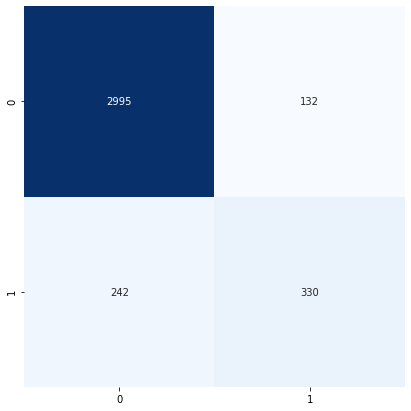

In [85]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, dt_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [86]:
fpr_dt,tpr_dt,thresh=roc_curve(y_test,dt_pred)
auc_dt=auc(fpr,tpr)

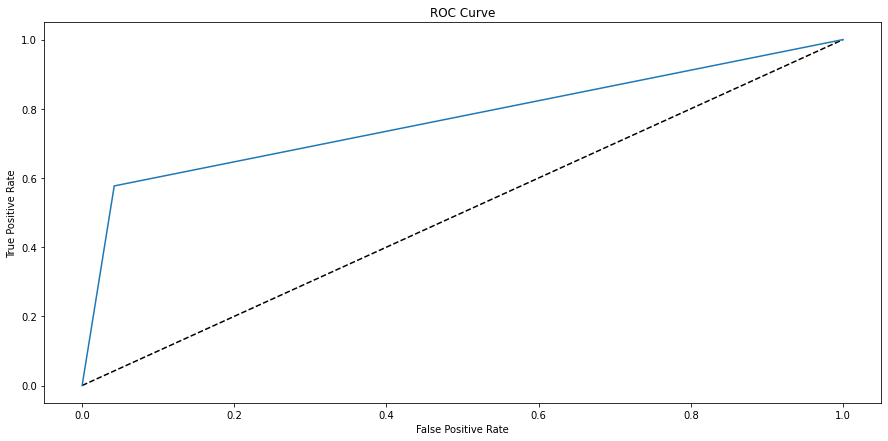

In [87]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dt, tpr_dt)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

##### 3. Random Forest

In [88]:
rf_sm=RandomForestClassifier(max_depth=6)
rf_sm.fit(x_train,y_train)
print('Train score:',rf_sm.score(x_train,y_train))
print('Test score:',rf_sm.score(x_test,y_test))

Train score: 0.9142625419997683
Test score: 0.8978102189781022


In [89]:
rf_sm_pred=rf_sm.predict(x_test)
print('F1 Score:',f1_score(y_test,rf_sm_pred))
print('Kappa Score:',cohen_kappa_score(y_test,rf_sm_pred))
print('Classification report:\n',classification_report(y_test,rf_sm_pred))


F1 Score: 0.5970149253731343
Kappa Score: 0.5417105053560226
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      3127
           1       0.77      0.49      0.60       572

    accuracy                           0.90      3699
   macro avg       0.84      0.73      0.77      3699
weighted avg       0.89      0.90      0.89      3699



<AxesSubplot:>

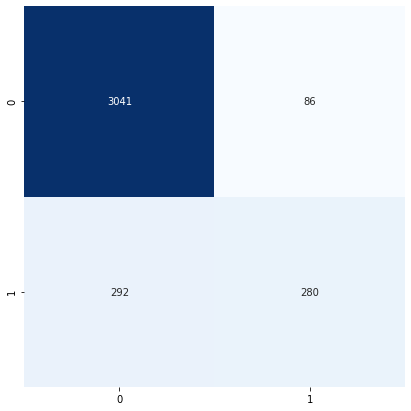

In [90]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, rf_sm_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [91]:
fpr_rf,tpr_rf,thresh=roc_curve(y_test,rf_sm_pred)
auc_rf=auc(fpr,tpr)


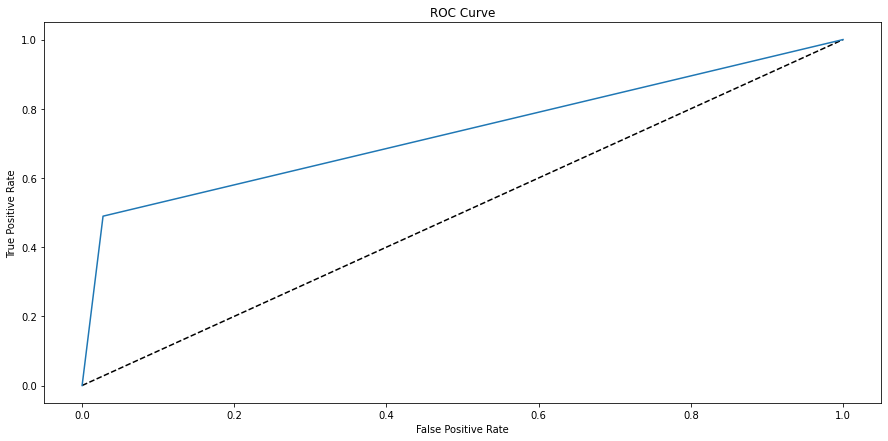

In [92]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

##### 4. Naive Bayes

In [168]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print('Train score:',gnb.score(x_train,y_train))
print('Test score:',gnb.score(x_test,y_test))

Train score: 0.8272789581905414
Test score: 0.8265935572309802


In [169]:
nb_pred=gnb.predict(x_test)
fpr2,tpr2,thresh=roc_curve(y_test,nb_pred)
auc2=auc(fpr2,tpr2)

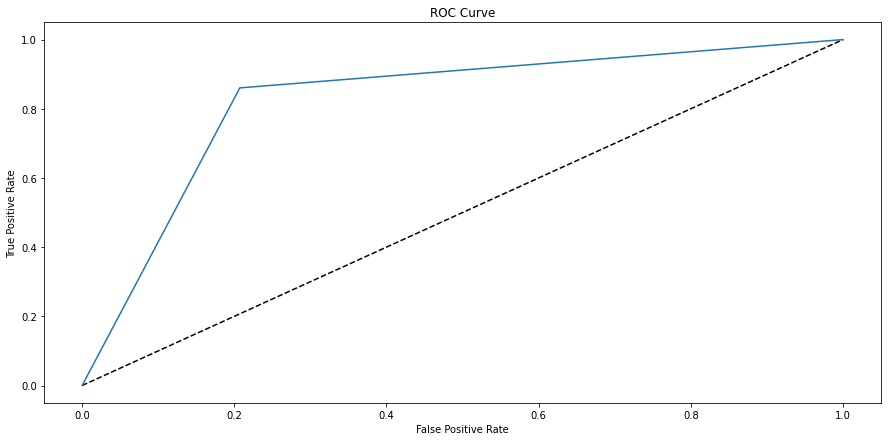

In [170]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2, tpr2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<AxesSubplot:>

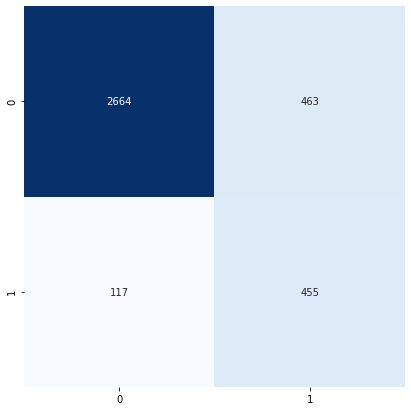

In [95]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, nb_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [96]:
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(x_train,y_train)
print('Train score:',dt.score(x_train,y_train))
print('Test score:',dt.score(x_test,y_test))


Train score: 0.9140308191403081
Test score: 0.8988915923222492


In [97]:
dt_pred=dt.predict(x_test)
print('F1 Score:',f1_score(y_test,dt_pred))
print('Kappa Score:',cohen_kappa_score(y_test,dt_pred))

F1 Score: 0.6382978723404256
Kappa Score: 0.5803015437598862


In [98]:
fpr3,tpr3,thresh=roc_curve(y_test,dt_pred)
auc3=auc(fpr3,tpr3)

In [99]:
rf_sm=RandomForestClassifier(max_depth=6)
rf_sm.fit(x_train,y_train)
print('Train score:',rf_sm.score(x_train,y_train))
print('Test score:',rf_sm.score(x_test,y_test))


Train score: 0.9150735720078785
Test score: 0.901595025682617


In [100]:
rf_pred_sm=rf_sm.predict(x_test)
print('F1 Score:',f1_score(y_test,rf_pred_sm))
print('Kappa Score:',cohen_kappa_score(y_test,rf_pred_sm))


F1 Score: 0.6168421052631577
Kappa Score: 0.5630749820386564


In [101]:
fpr4,tpr4,thresh=roc_curve(y_test,rf_pred_sm)
auc4=auc(fpr4,tpr4)

#### Data Modelling - with SMOTE

In [104]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority',random_state=3)

x_train_sm,y_train_sm=smote.fit_resample(x_train,y_train)

In [105]:
# target before smote
y_train.value_counts()

0    7295
1    1336
Name: Revenue, dtype: int64

In [106]:
# target after smote
y_train_sm.value_counts()

0    7295
1    7295
Name: Revenue, dtype: int64

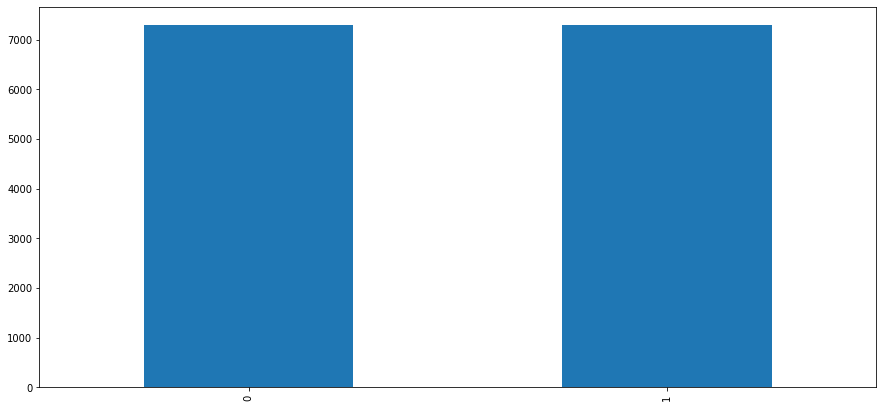

In [172]:
# target after smote
y_train_sm.value_counts().plot(kind='bar')
plt.show()

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x_train_sm,y_train_sm,test_size=0.3,random_state=1)

##### 1. Logistic Regression

In [113]:
log=LogisticRegression(penalty='l1',solver='liblinear')
log.fit(x_train,y_train)
print('Train score:',log.score(x_train,y_train))
print('Test score:',log.score(x_test,y_test))

Train score: 0.8603740330950749
Test score: 0.8578935343842815


In [114]:
log_sm1_pred=log.predict(x_test)
print('F1 Score:',f1_score(y_test,log_sm1_pred))
print('Kappa Score:',cohen_kappa_score(y_test,log_sm1_pred))

F1 Score: 0.8551467163483931
Kappa Score: 0.7157997522206814


<AxesSubplot:>

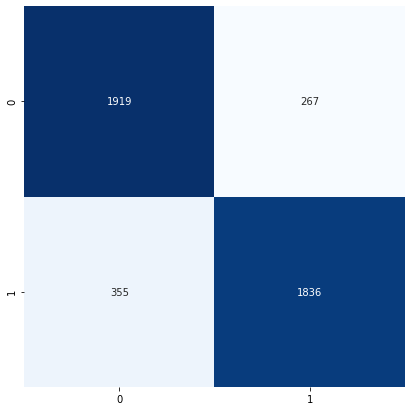

In [115]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, log_sm1_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [117]:
fpr1,tpr1,thresh=roc_curve(y_test,log_sm1_pred)
auc1=auc(fpr1,tpr1)


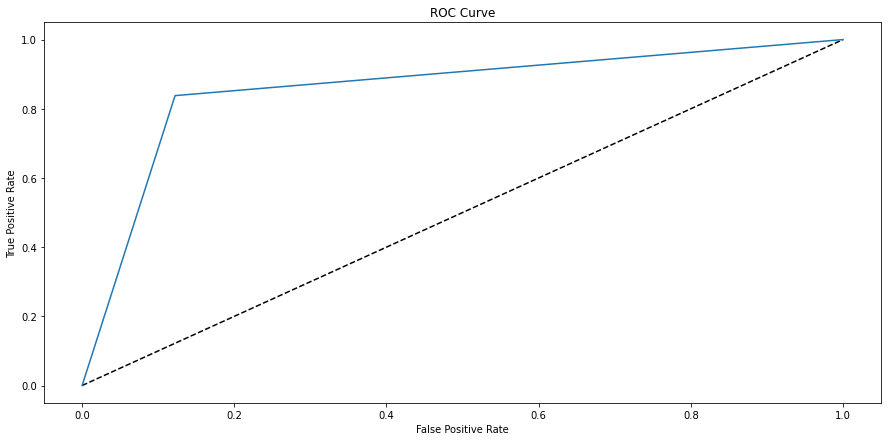

In [173]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

##### 2. Naive Bayes

In [118]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print('Train score:',gnb.score(x_train,y_train))
print('Test score:',gnb.score(x_test,y_test))


Train score: 0.8272789581905414
Test score: 0.8265935572309802


In [119]:
nb_pred=gnb.predict(x_test)
fpr2,tpr2,thresh=roc_curve(y_test,nb_pred)
auc2=auc(fpr2,tpr2)

<AxesSubplot:>

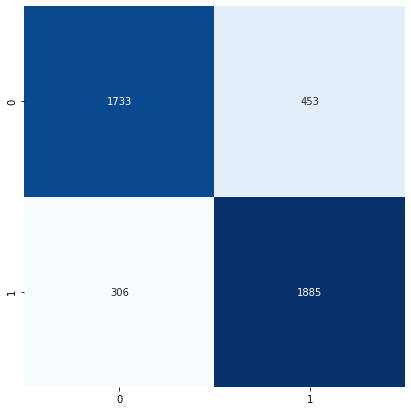

In [120]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, nb_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

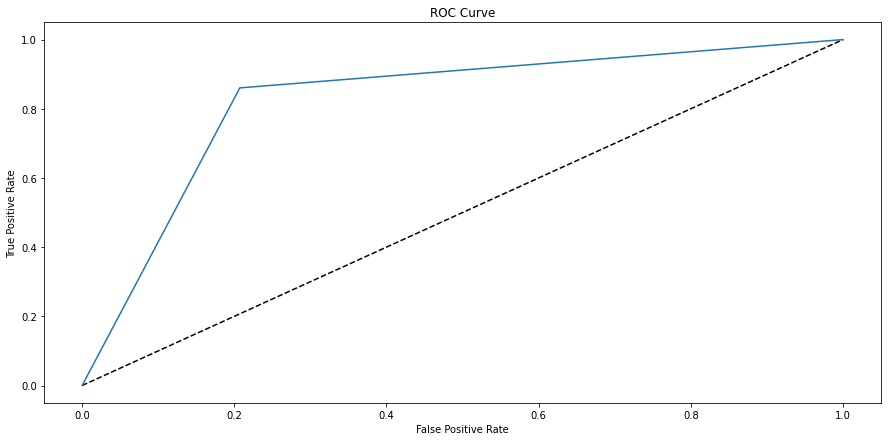

In [121]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2, tpr2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

##### 3. Decision Tree

In [122]:
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(x_train,y_train)
print('Train score:',dt.score(x_train,y_train))
print('Test score:',dt.score(x_test,y_test))

Train score: 0.912660334867326
Test score: 0.9099840073109435


In [123]:
dt_sm1_pred_sm=dt.predict(x_test)
print('F1 Score:',f1_score(y_test,dt_sm1_pred_sm))
print('Kappa Score:',cohen_kappa_score(y_test,dt_sm1_pred_sm))

F1 Score: 0.912014292094685
Kappa Score: 0.8199587579442948


<AxesSubplot:>

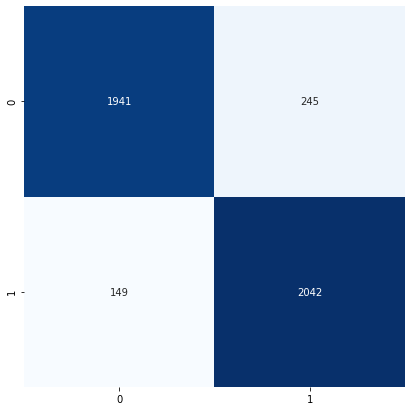

In [124]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, dt_sm1_pred_sm)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [126]:
fpr3,tpr3,thresh=roc_curve(y_test,dt_sm1_pred_sm)
auc3=auc(fpr3,tpr3)

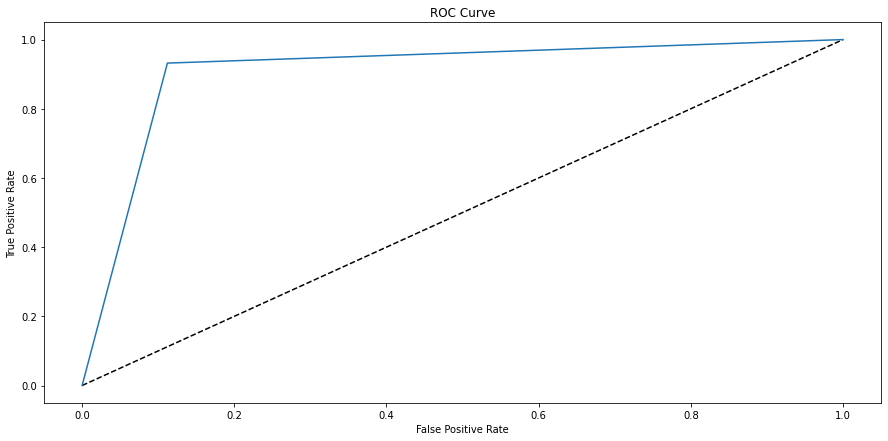

In [127]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr3, tpr3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

##### 3. Random Forest

In [128]:
rf_sm1=RandomForestClassifier(n_estimators=50,max_depth=16)
rf_sm1.fit(x_train,y_train)
print('Train score:',rf_sm1.score(x_train,y_train))
print('Test score:',rf_sm1.score(x_test,y_test))

Train score: 0.9876627827278959
Test score: 0.9326022389764679


In [129]:
rf_sm1_pred_sm=rf_sm1.predict(x_test)
print('F1 Score:',f1_score(y_test,rf_sm1_pred_sm))
print('Kappa Score:',cohen_kappa_score(y_test,rf_sm1_pred_sm))


F1 Score: 0.9337525263867057
Kappa Score: 0.8651993063357156


<AxesSubplot:>

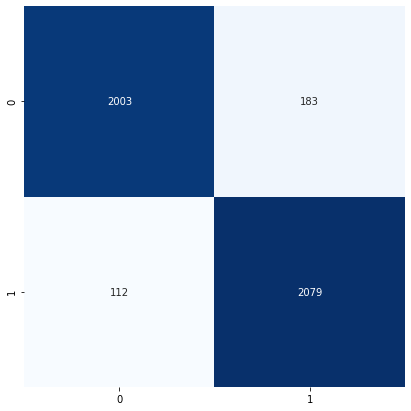

In [130]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, rf_sm1_pred_sm)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [131]:
fpr4,tpr4,thresh=roc_curve(y_test,rf_sm1_pred_sm)
auc4=auc(fpr4,tpr4)

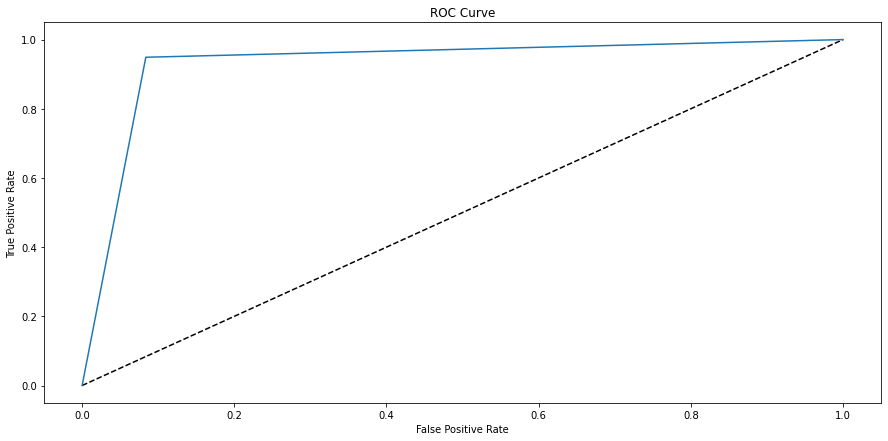

In [132]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr4, tpr4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

##### 4. Gradient Boosting

In [133]:
gb=GradientBoostingClassifier(n_estimators=50,max_depth=5)
gb.fit(x_train,y_train)
print('Train score:',gb.score(x_train,y_train))
print('Test score:',gb.score(x_test,y_test))

Train score: 0.9358660530696171
Test score: 0.9236920265021704


In [134]:
gb_pred_sm=gb.predict(x_test)
print('F1 Score:',f1_score(y_test,gb_pred_sm))
print('Kappa Score:',cohen_kappa_score(y_test,gb_pred_sm))

F1 Score: 0.9250112258643917
Kappa Score: 0.8473781180144428


<AxesSubplot:>

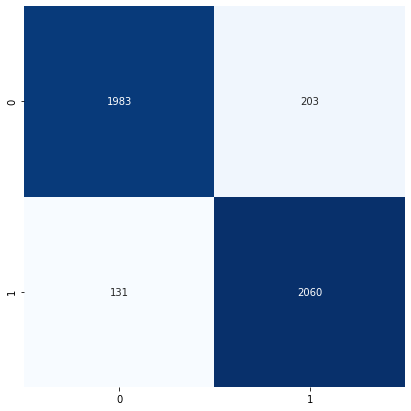

In [135]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, gb_pred_sm)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [136]:
fpr6,tpr6,thresh=roc_curve(y_test,gb_pred_sm)
auc6=auc(fpr6,tpr6)

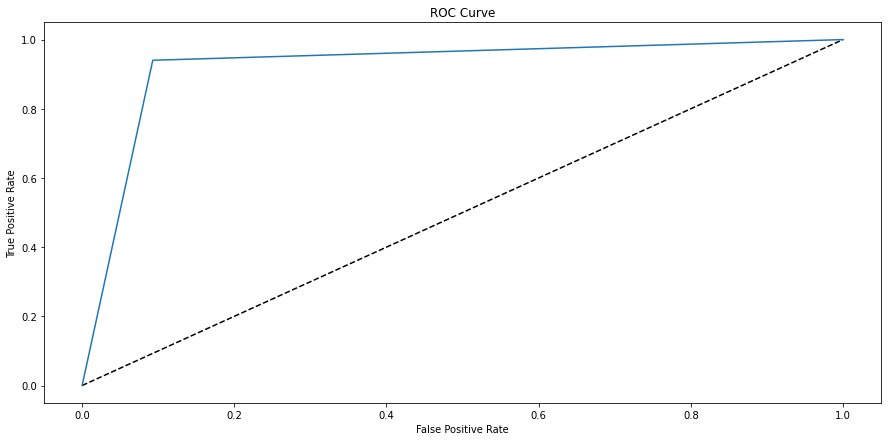

In [137]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr6, tpr6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

##### ROC CURVES FOR ALL MODELS

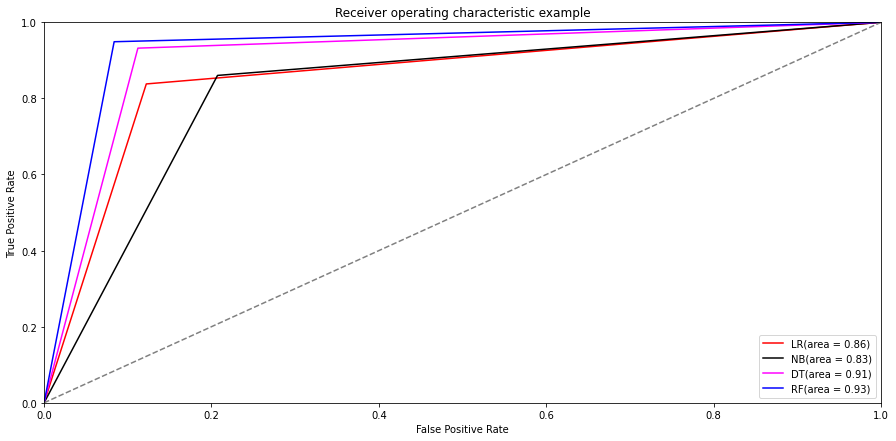

In [138]:
plt.plot(fpr1,tpr1, label='LR(area = %0.2f)' % auc1,color='red')
plt.plot(fpr2, tpr2, label='NB(area = %0.2f)' % auc2,color='black')
plt.plot(fpr3, tpr3, label='DT(area = %0.2f)' % auc3,color='magenta')
plt.plot(fpr4, tpr4, label='RF(area = %0.2f)' % auc4,color='blue')

plt.plot([0, 1], [0, 1], 'k--',color='grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**As observed from findings it is clear that the performance improved with SMOTE. Among all models Random Forest With Feature Selection gives best accuracy metrics.**

As seen from accuracy metrics and ROC, we can see that Random Forest is best among all as it gives 98% area under, F1 score as 0.90

Transformation improved accuracies for Logistic and Naïve Bayes but it hardly improved Random Forest and Decision Tree. So, we go ahead without transformations as it hardly improves any accuracy.

KNN is a classification technique but due to less computational power we were able to use it. Also, KNN takes more time to

Random Forest was used for feature selection and the important features given by Random Forest are supported by the EDA analysis done.

#### Insights:

- We suggest to provide discount 3 to 4 days prior to the special day to increase revenue.

- Jan & April require special attention to generate some revenue. Month of Feb has had special days but revenue is very low, hence need to take advantage of that.

- Advertising on other browsers will help to reach new consumers since we do have users using non mainstream browsers.

- Region - We have reach in multiple regions hence an extensive market will help to generate revenue in low generating regions.

- We have to design plans to generate revenue from the new visitors.

- Special offers during weekends has to be promoted since weekend revenue is very low.

- We already have good exit rate during the month of July, June, May and August reducing Bounce rate in that period can result into increased revenue.

- Apart from the regular traffic generator channels special plans needs to be made for other channels also.

- Since lots of pages have low page values, we suggest to make the product search algorithm better so that we can increase pages value.